In [ ]:
#Importing useful libraries for data visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Connection to Dataset
path = "/content/drive/MyDrive/AI POCs/Datasets/Fraud Detection Datasets/application_train.csv"
path1 = "/content/drive/MyDrive/AI POCs/Datasets/Fraud Detection Datasets/credit_card_balance.csv"
path2 = "/content/drive/MyDrive/AI POCs/Datasets/Fraud Detection Datasets/application_test.csv"
path3 = "/content/drive/MyDrive/AI POCs/Datasets/Fraud Detection Datasets/bureau_balance.csv"
path4 = "/content/drive/MyDrive/AI POCs/Datasets/Fraud Detection Datasets/bureau.csv"
path5 = "/content/drive/MyDrive/AI POCs/Datasets/Fraud Detection Datasets/HomeCredit_columns_description.csv"
path6 = "/content/drive/MyDrive/AI POCs/Datasets/Fraud Detection Datasets/installments_payments.csv"
path7 = "/content/drive/MyDrive/AI POCs/Datasets/Fraud Detection Datasets/POS_CASH_balance.csv"
path8 = "/content/drive/MyDrive/AI POCs/Datasets/Fraud Detection Datasets/previous_application.csv"
path9 = "/content/drive/MyDrive/AI POCs/Datasets/Fraud Detection Datasets/sample_submission.csv"

app_train = pd.read_csv(path)
app_test = pd.read_csv(path2)
credit = pd.read_csv(path1)
bureau_balance = pd.read_csv(path3)
bureau = pd.read_csv(path4)
#descriptions = pd.read_csv(path5)
installments = pd.read_csv(path6)
POS = pd.read_csv(path7)
prev_app = pd.read_csv(path8)
sample = pd.read_csv(path9)

In [ ]:
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [ ]:
app_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [ ]:
credit.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

In [ ]:
bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [ ]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [ ]:
installments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [ ]:
POS.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [ ]:
prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [ ]:
app_train.shape

(307511, 122)

In [ ]:
app_test.shape

(48744, 121)

In [ ]:
print(app_train.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [ ]:
numeric_apptrain = app_train.select_dtypes(include=['float64', 'int64'])
categorical_apptrain = app_train.select_dtypes(include=['object'])

In [ ]:
numeric_apptrain.hist(figsize=(15,12), bins=30, edgecolor='black')
plt.suptitle("Distirbution of Numerical Features")
plt.tight_layout()
plt.show()

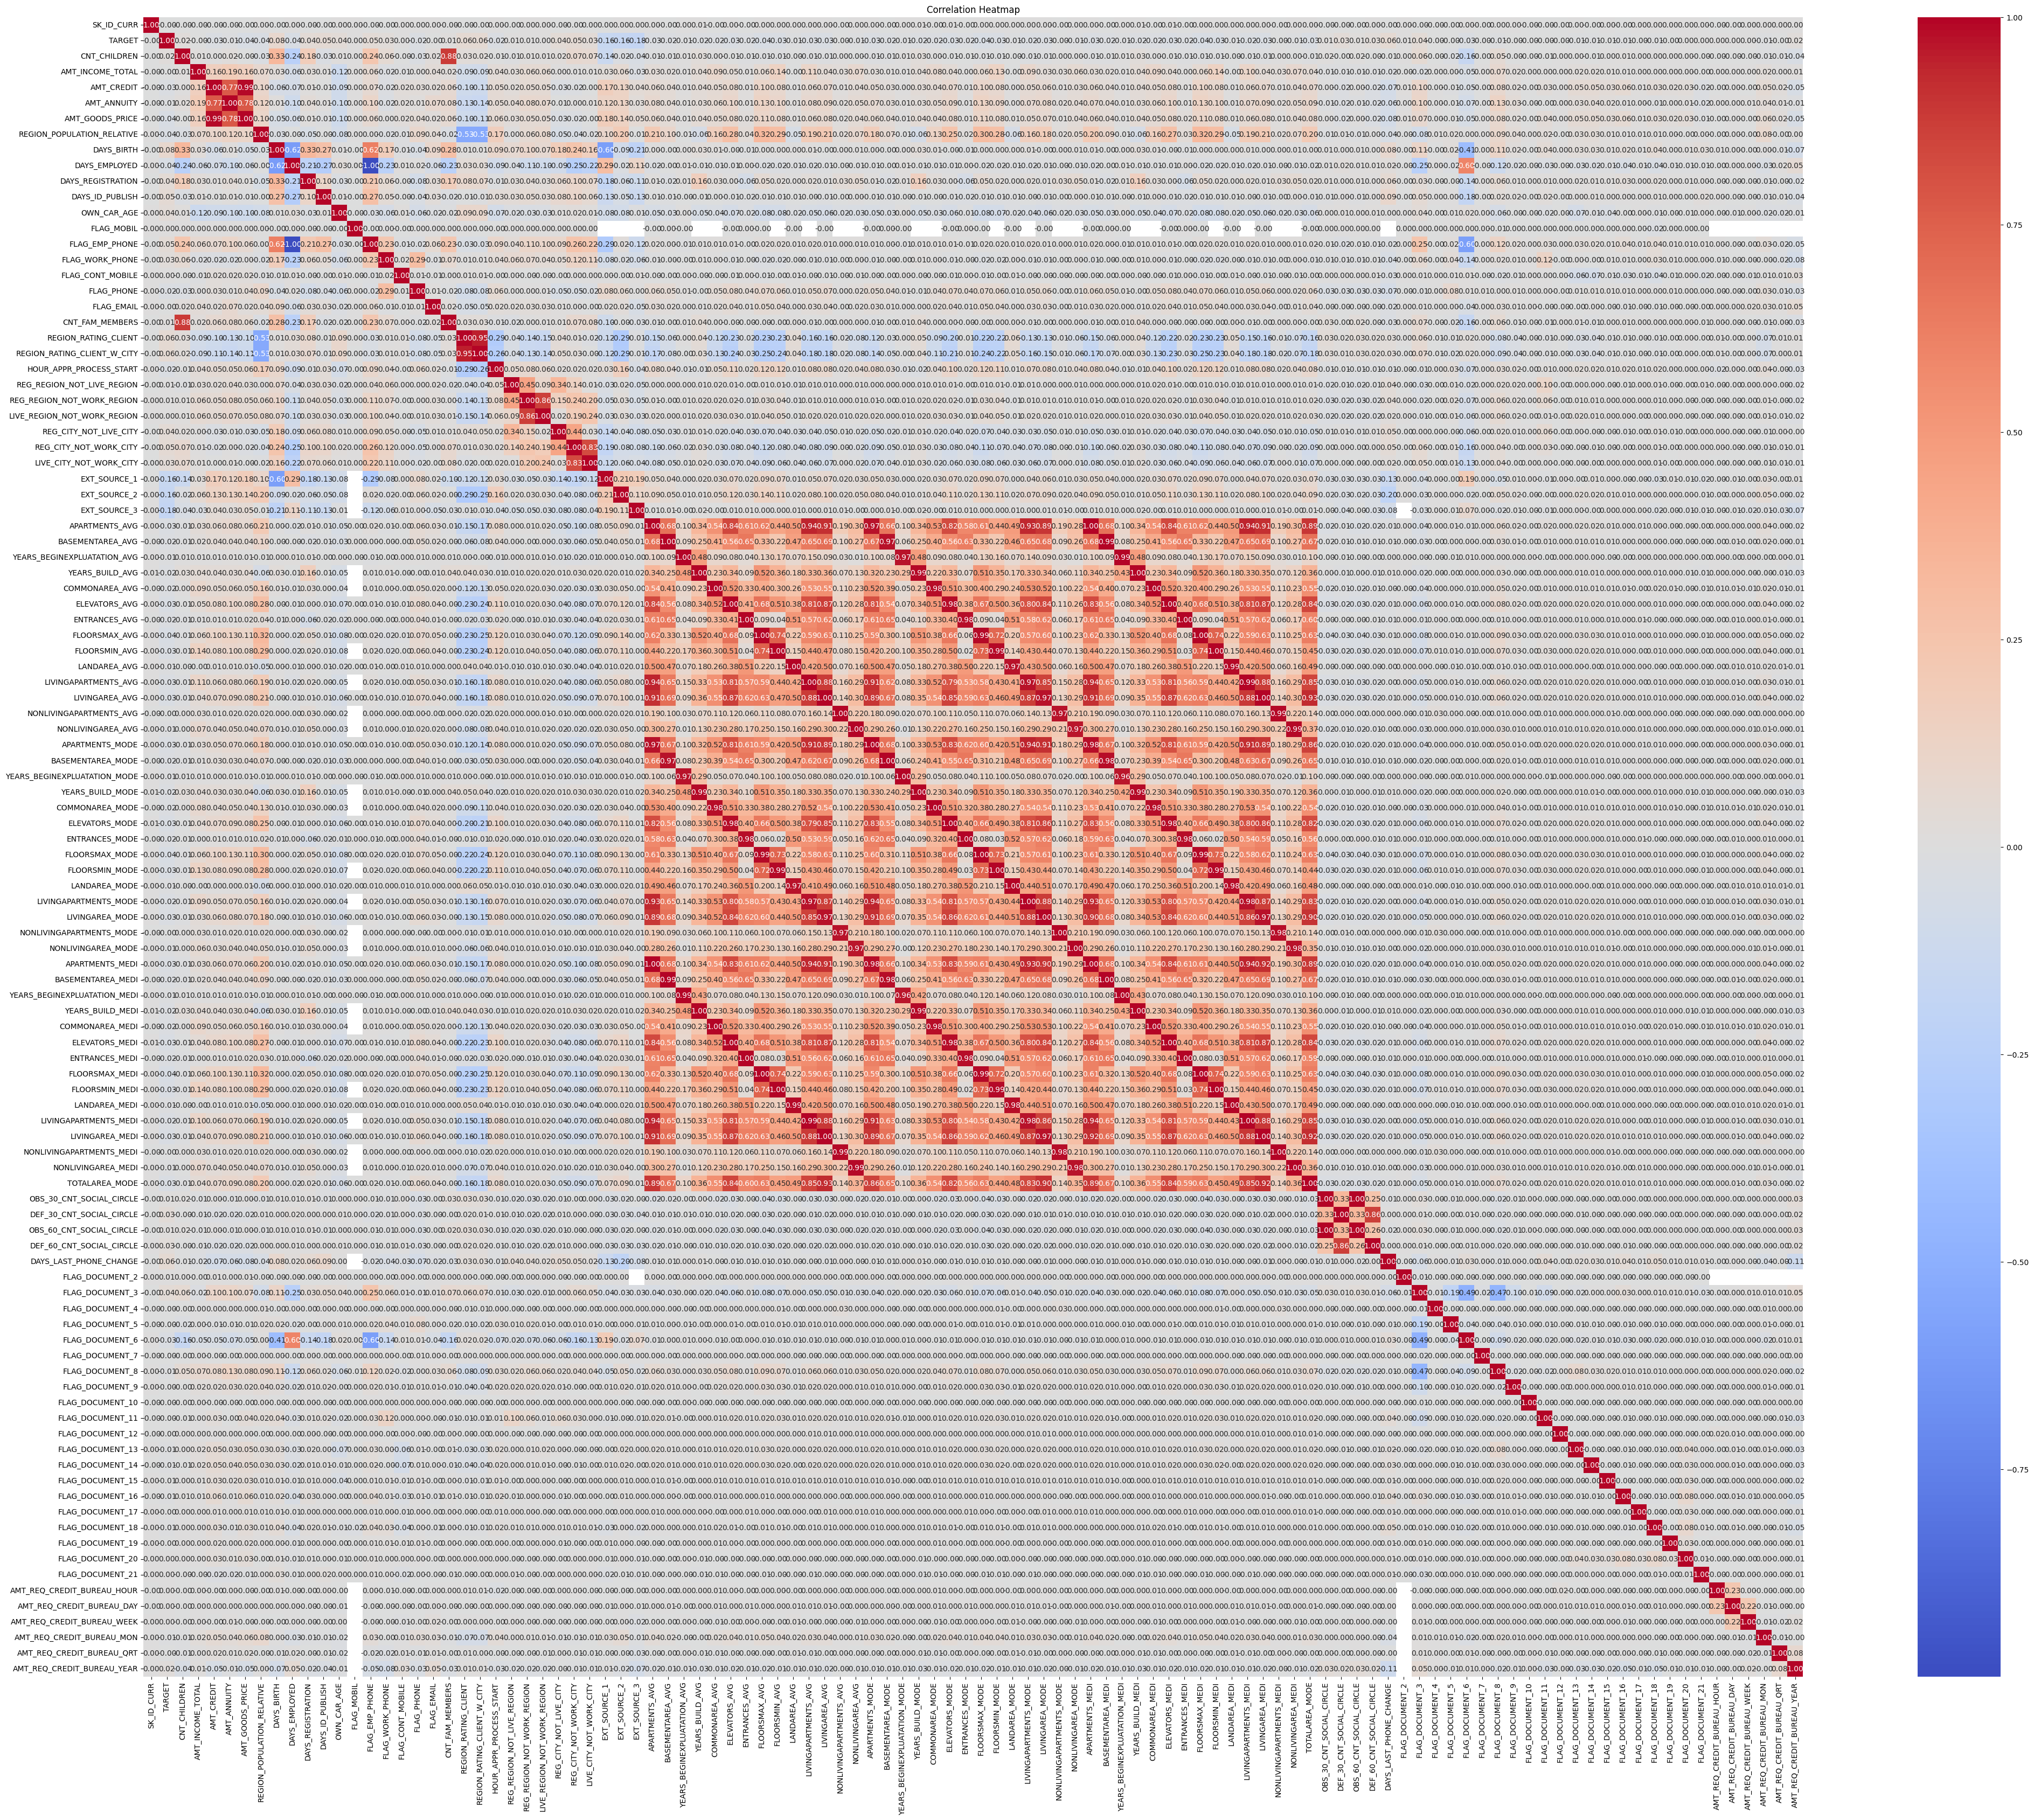

In [ ]:
def plot_correlation_heatmap(app_train):

    plt.figure(figsize=(55, 40))
    correlation_matrix = numeric_apptrain.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(app_train)

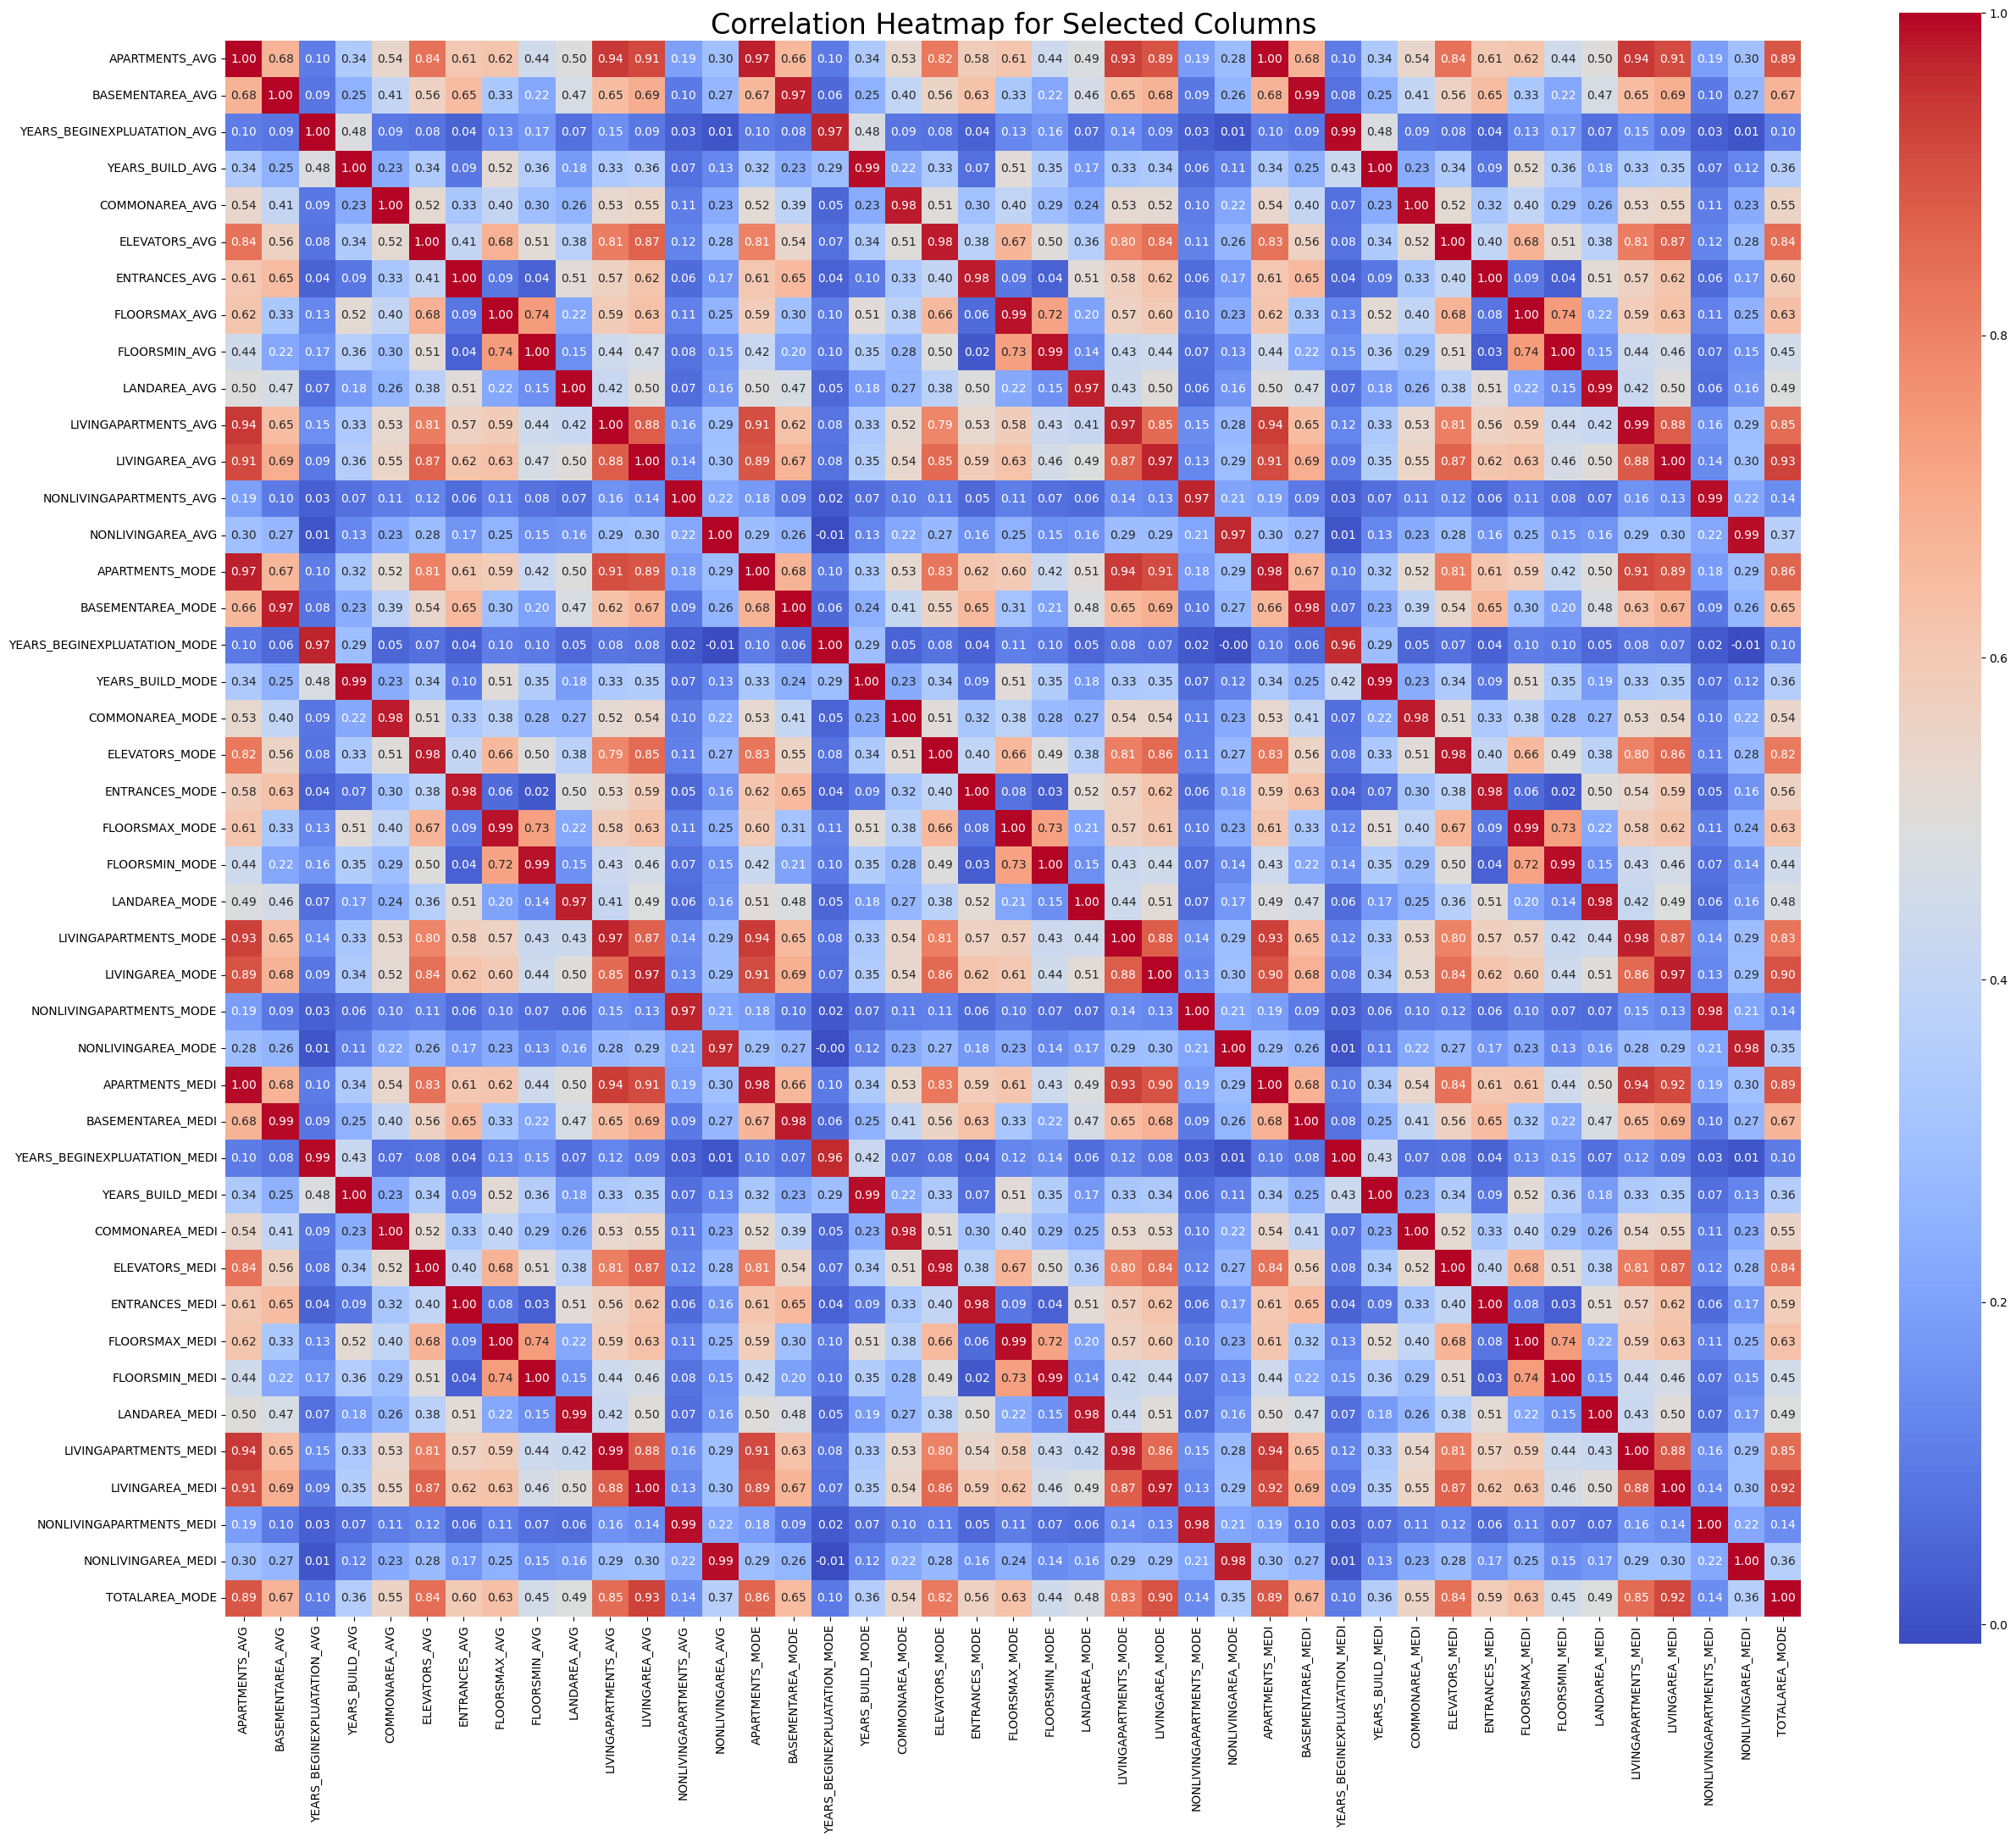

In [ ]:
def plot_selected_correlation_heatmap(app_train):
    # Select the relevant columns
    selected_columns = [
        'APARTMENTS_AVG',
        'BASEMENTAREA_AVG',
        'YEARS_BEGINEXPLUATATION_AVG',
        'YEARS_BUILD_AVG',
        'COMMONAREA_AVG',
        'ELEVATORS_AVG',
        'ENTRANCES_AVG',
        'FLOORSMAX_AVG',
        'FLOORSMIN_AVG',
        'LANDAREA_AVG',
        'LIVINGAPARTMENTS_AVG',
        'LIVINGAREA_AVG',
        'NONLIVINGAPARTMENTS_AVG',
        'NONLIVINGAREA_AVG',
        'APARTMENTS_MODE',
        'BASEMENTAREA_MODE',
        'YEARS_BEGINEXPLUATATION_MODE',
        'YEARS_BUILD_MODE',
        'COMMONAREA_MODE',
        'ELEVATORS_MODE',
        'ENTRANCES_MODE',
        'FLOORSMAX_MODE',
        'FLOORSMIN_MODE',
        'LANDAREA_MODE',
        'LIVINGAPARTMENTS_MODE',
        'LIVINGAREA_MODE',
        'NONLIVINGAPARTMENTS_MODE',
        'NONLIVINGAREA_MODE',
        'APARTMENTS_MEDI',
        'BASEMENTAREA_MEDI',
        'YEARS_BEGINEXPLUATATION_MEDI',
        'YEARS_BUILD_MEDI',
        'COMMONAREA_MEDI',
        'ELEVATORS_MEDI',
        'ENTRANCES_MEDI',
        'FLOORSMAX_MEDI',
        'FLOORSMIN_MEDI',
        'LANDAREA_MEDI',
        'LIVINGAPARTMENTS_MEDI',
        'LIVINGAREA_MEDI',
        'NONLIVINGAPARTMENTS_MEDI',
        'NONLIVINGAREA_MEDI',
        'TOTALAREA_MODE'
    ]

    # Create the correlation matrix for the selected columns
    correlation_matrix = app_train[selected_columns].corr()

    # Plot the heatmap
    plt.figure(figsize=(30, 25))  # Adjust size as needed
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Heatmap for Selected Columns', fontsize=24)
    plt.show()

plot_selected_correlation_heatmap(app_train)

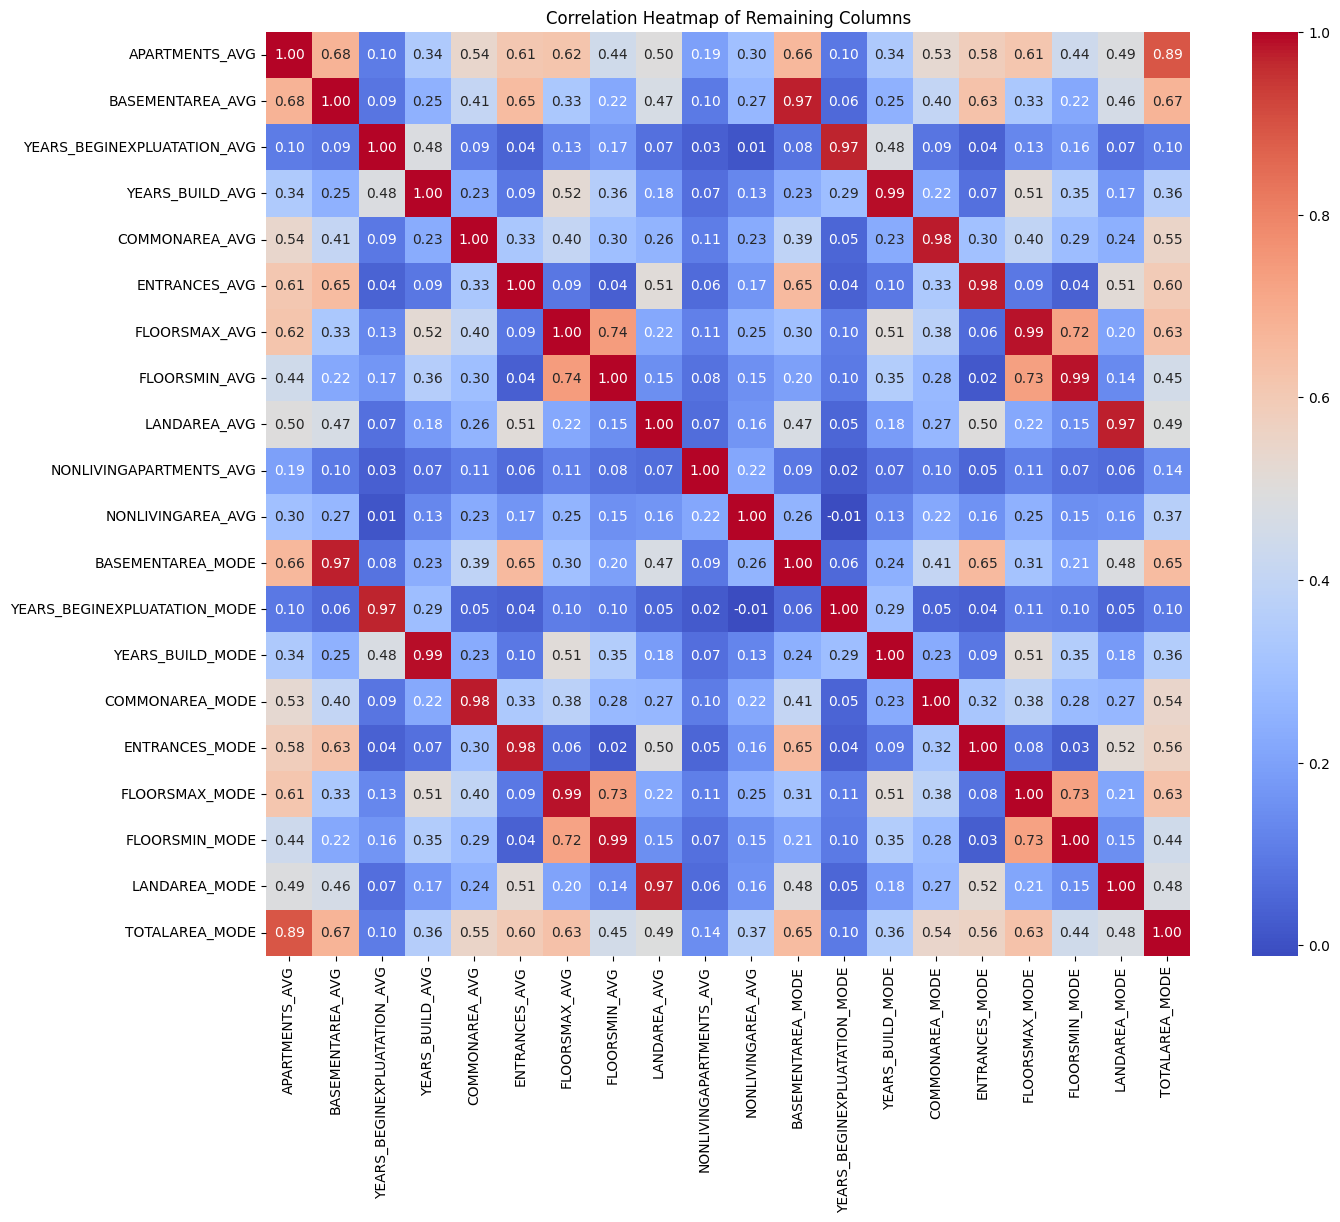

In [ ]:
remaining_columns = [
    'APARTMENTS_AVG',
    'BASEMENTAREA_AVG',
    'YEARS_BEGINEXPLUATATION_AVG',
    'YEARS_BUILD_AVG',
    'COMMONAREA_AVG',
    'ENTRANCES_AVG',
    'FLOORSMAX_AVG',
    'FLOORSMIN_AVG',
    'LANDAREA_AVG',
    'NONLIVINGAPARTMENTS_AVG',
    'NONLIVINGAREA_AVG',
    'BASEMENTAREA_MODE',
    'YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BUILD_MODE',
    'COMMONAREA_MODE',
    'ENTRANCES_MODE',
    'FLOORSMAX_MODE',
    'FLOORSMIN_MODE',
    'LANDAREA_MODE',
    'TOTALAREA_MODE'
]

# Select the remaining columns
filtered_data = app_train[remaining_columns]

# Calculate the correlation matrix
correlation_matrix = filtered_data.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Remaining Columns')
plt.show()

In [ ]:
threshold = numeric_apptrain.var().quantile(0.15)
low_variance_features = numeric_apptrain.var()[numeric_apptrain.var() < threshold]
print(low_variance_features)

REGION_POPULATION_RELATIVE    0.000191
FLAG_MOBIL                    0.000003
FLAG_CONT_MOBILE              0.001863
NONLIVINGAPARTMENTS_AVG       0.002278
NONLIVINGAPARTMENTS_MODE      0.002141
NONLIVINGAPARTMENTS_MEDI      0.002248
FLAG_DOCUMENT_2               0.000042
FLAG_DOCUMENT_4               0.000081
FLAG_DOCUMENT_7               0.000192
FLAG_DOCUMENT_10              0.000023
FLAG_DOCUMENT_12              0.000007
FLAG_DOCUMENT_15              0.001208
FLAG_DOCUMENT_17              0.000267
FLAG_DOCUMENT_19              0.000595
FLAG_DOCUMENT_20              0.000507
FLAG_DOCUMENT_21              0.000335
dtype: float64


In [ ]:
numeric_bureau_balance = bureau_balance.select_dtypes(include=['float64', 'int64'])
categorical_bureau_balance = bureau_balance.select_dtypes(include=['object'])

In [ ]:
bureau_balance.shape

(27299925, 3)

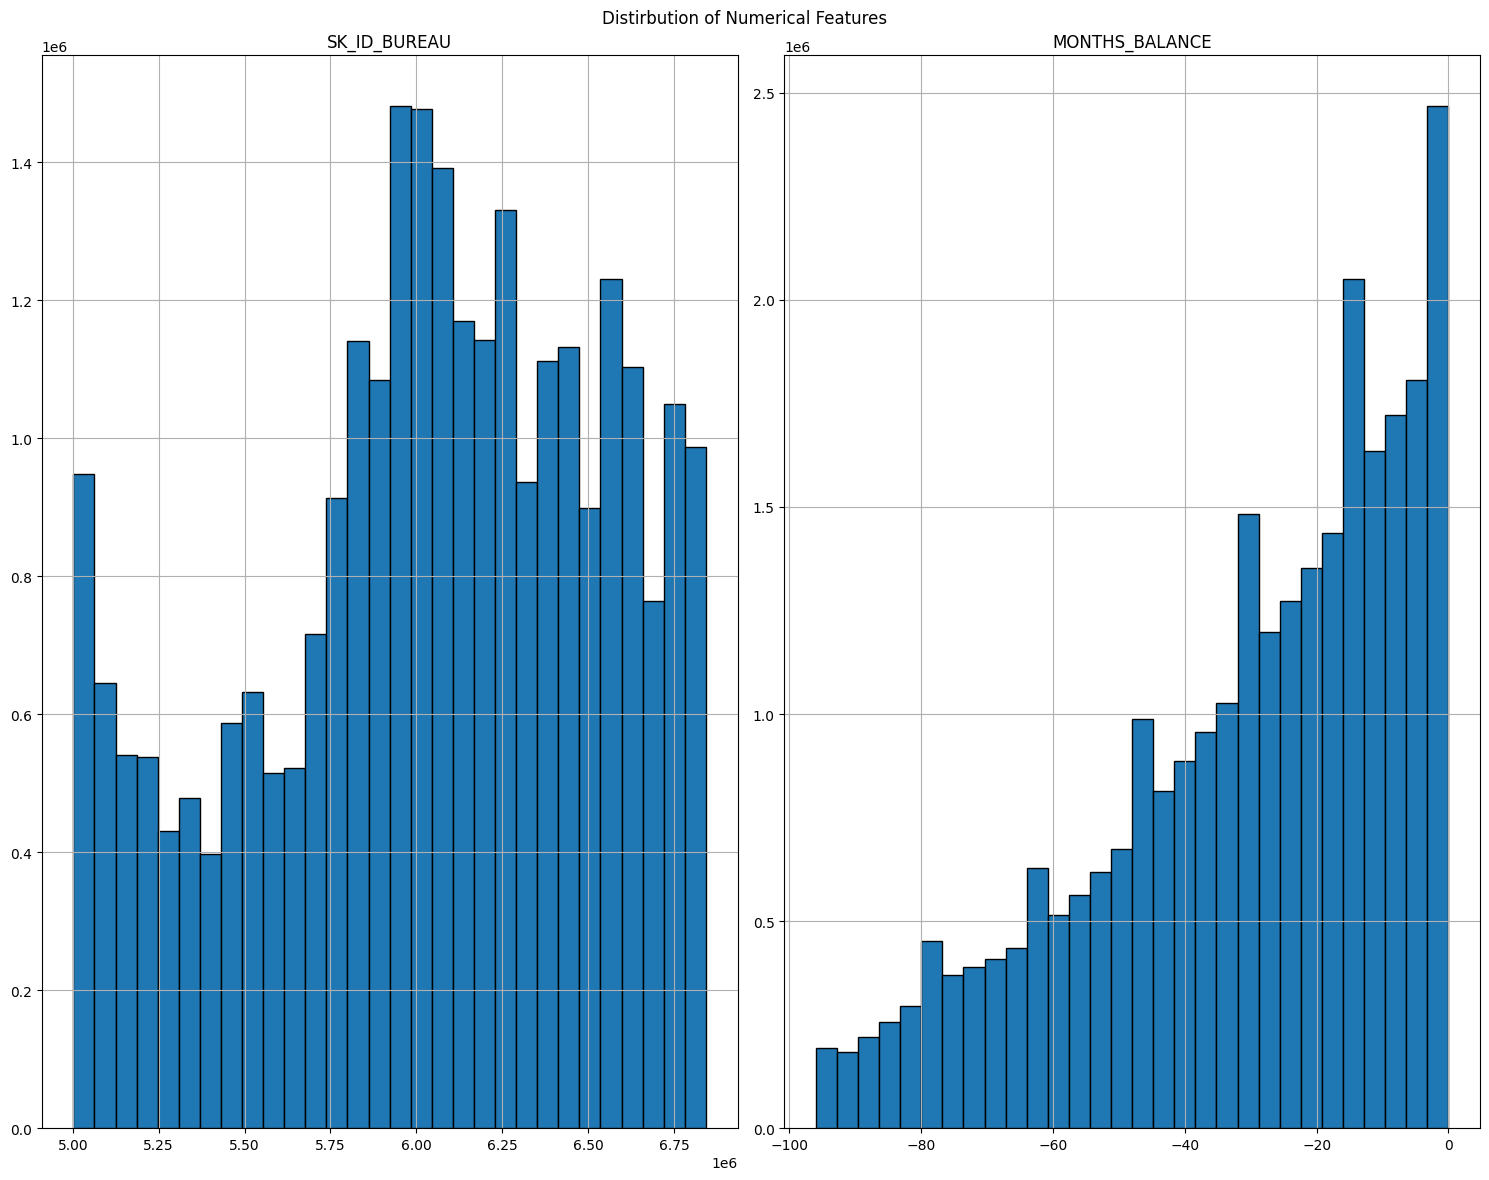

In [ ]:
numeric_bureau_balance.hist(figsize=(15,12), bins=30, edgecolor='black')
plt.suptitle("Distirbution of Numerical Features")
plt.tight_layout()
plt.show()

In [ ]:
bureau_balance.columns

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [ ]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [ ]:
numeric_bureau = bureau.select_dtypes(include=['float64', 'int64'])
categorical_bureau = bureau.select_dtypes(include=['object'])

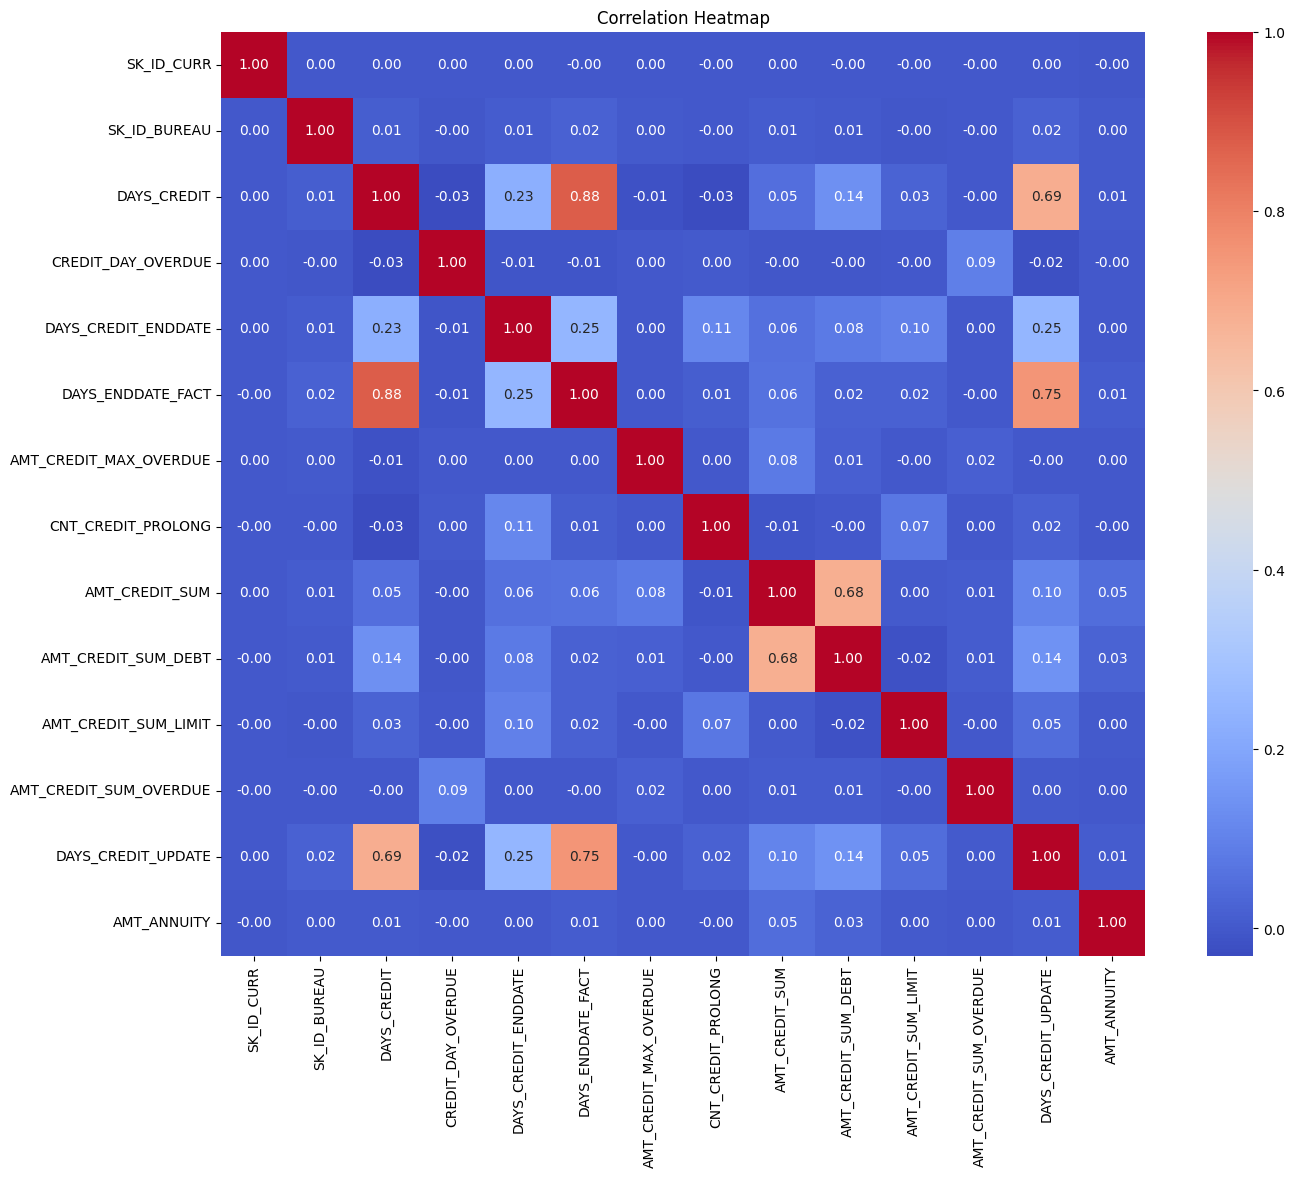

In [ ]:
def plot_correlation_heatmap(bureau):

    plt.figure(figsize=(16, 12))
    correlation_matrix = numeric_bureau.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(bureau)

Will probably drop Day_Credit_Update

In [ ]:
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [ ]:
threshold = numeric_bureau.var().quantile(0.15)
low_variance_features = numeric_bureau.var()[numeric_bureau.var() < threshold]
print(low_variance_features)

CREDIT_DAY_OVERDUE    1335.495218
CNT_CREDIT_PROLONG       0.009259
dtype: float64


In [ ]:
numeric_installments = installments.select_dtypes(include=['float64', 'int64'])
categorical_installments = installments.select_dtypes(include=['object'])

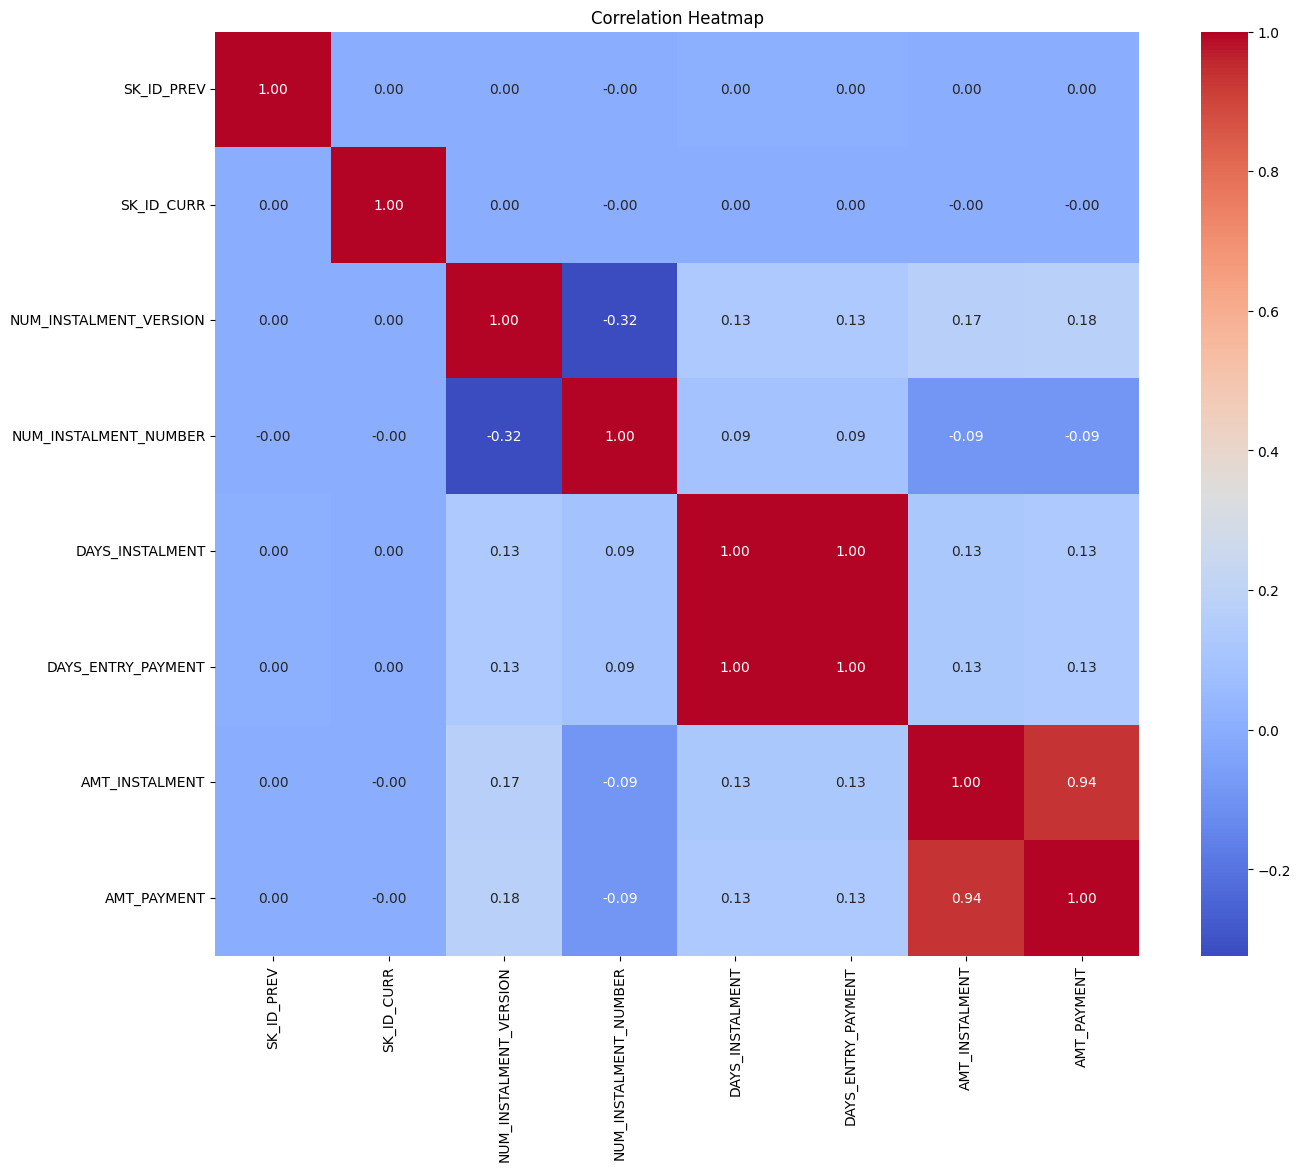

In [ ]:
def plot_correlation_heatmap(bureau):

    plt.figure(figsize=(16, 12))
    correlation_matrix = numeric_installments.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(bureau)

In [ ]:
installments.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [ ]:
threshold = numeric_installments.var().quantile(0.15)
low_variance_features = numeric_installments.var()[numeric_installments.var() < threshold]
print(low_variance_features)

NUM_INSTALMENT_VERSION      1.071672
NUM_INSTALMENT_NUMBER     710.972463
dtype: float64


In [ ]:
POS.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [ ]:
numeric_POS = POS.select_dtypes(include=['float64', 'int64'])
categorical_POS = POS.select_dtypes(include=['object'])

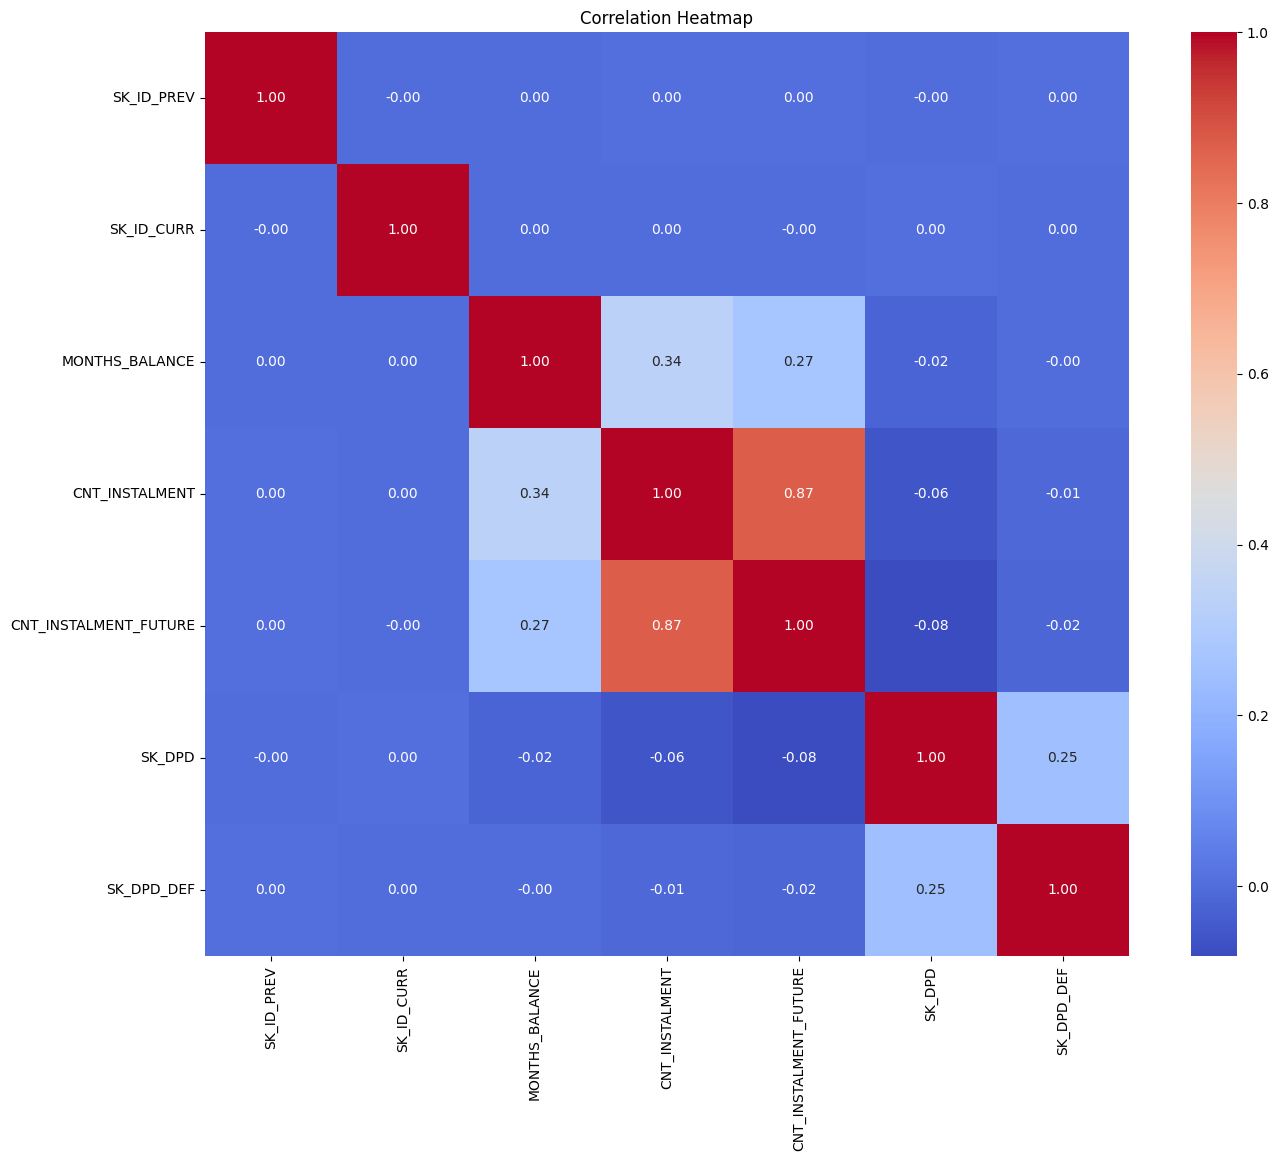

In [ ]:
def plot_correlation_heatmap(POS):

    plt.figure(figsize=(16, 12))
    correlation_matrix = numeric_POS.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(POS)

In [ ]:
threshold = numeric_POS.var().quantile(0.15)
low_variance_features = numeric_POS.var()[numeric_POS.var() < threshold]
print(low_variance_features)

CNT_INSTALMENT_FUTURE    123.411162
dtype: float64


In [ ]:
numeric_prev_app = prev_app.select_dtypes(include=['float64', 'int64'])
categorical_prev_app = prev_app.select_dtypes(include=['object'])

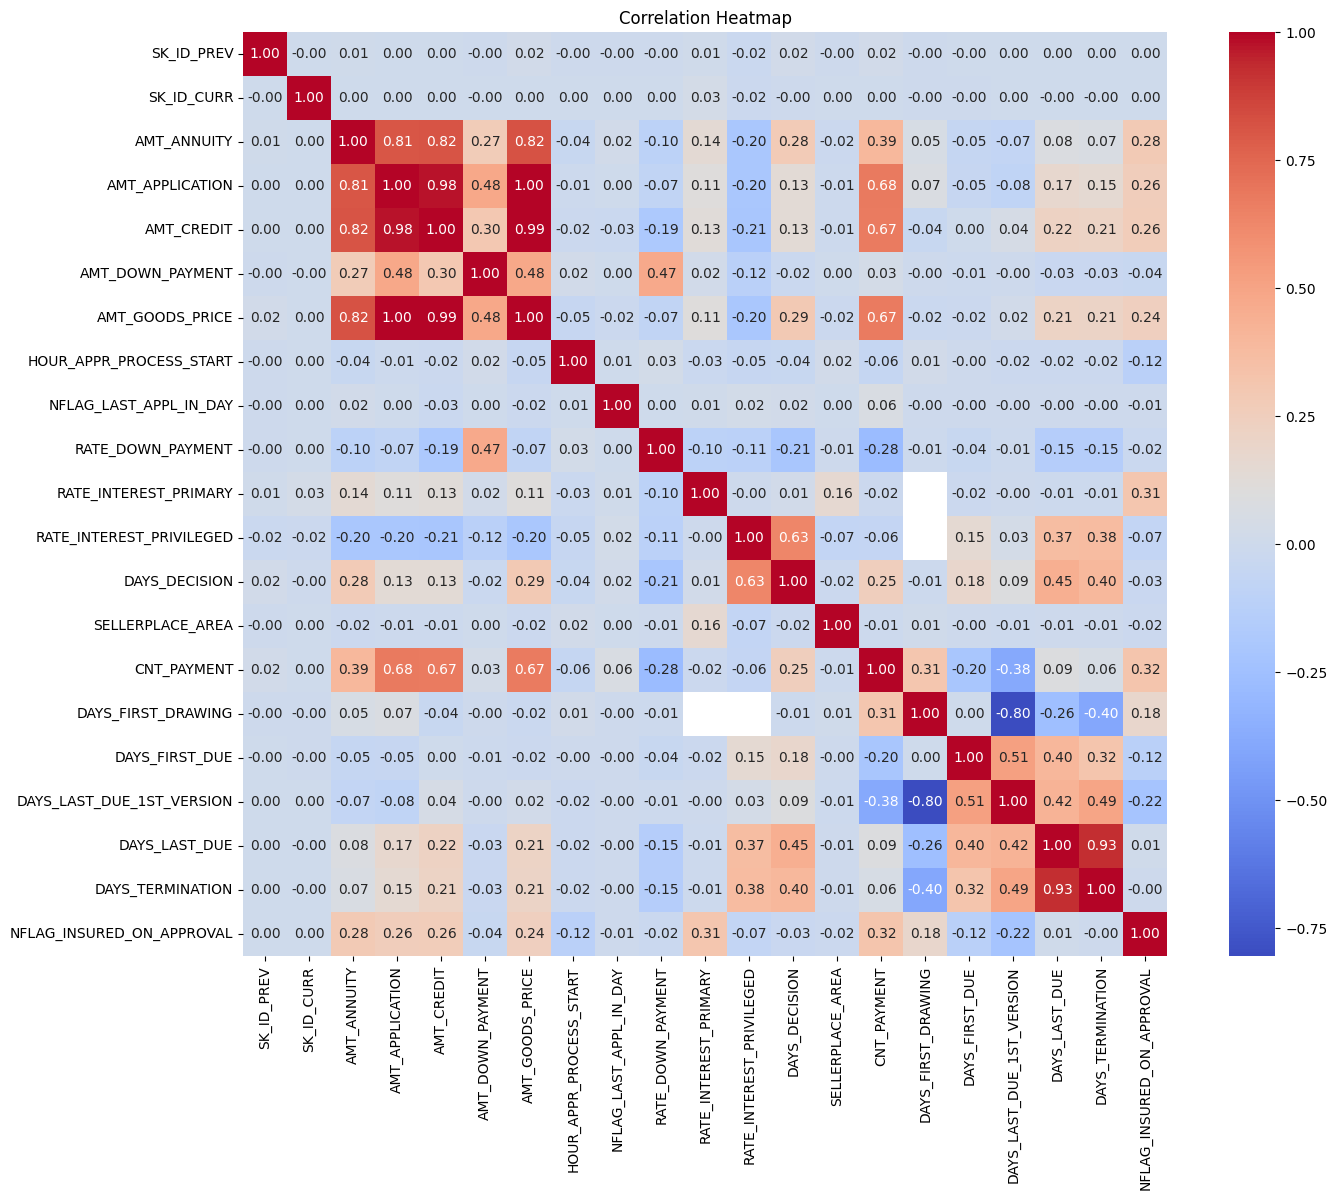

In [ ]:
def plot_correlation_heatmap(prev_app):

    plt.figure(figsize=(16, 12))
    correlation_matrix = numeric_prev_app.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(prev_app)

Drop days_last_due,NFLAG_LAST_APPL_IN_DAY and RATE_INTEREST_PRIMARY, AMT_GOODS_PRICE, AMT_APPLICATION

In [ ]:
threshold = numeric_prev_app.var().quantile(0.15)
low_variance_features = numeric_prev_app.var()[numeric_prev_app.var() < threshold]
print(low_variance_features)

NFLAG_LAST_APPL_IN_DAY      0.003520
RATE_INTEREST_PRIMARY       0.007686
RATE_INTEREST_PRIVILEGED    0.010176
dtype: float64


In [ ]:
numeric_prev_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [ ]:
credit.fillna(0, inplace=True)
credit.isnull().sum()

SK_ID_PREV                    0
SK_ID_CURR                    0
MONTHS_BALANCE                0
AMT_BALANCE                   0
AMT_CREDIT_LIMIT_ACTUAL       0
AMT_DRAWINGS_ATM_CURRENT      0
AMT_DRAWINGS_CURRENT          0
AMT_DRAWINGS_OTHER_CURRENT    0
AMT_DRAWINGS_POS_CURRENT      0
AMT_INST_MIN_REGULARITY       0
AMT_PAYMENT_CURRENT           0
AMT_PAYMENT_TOTAL_CURRENT     0
AMT_RECEIVABLE_PRINCIPAL      0
AMT_RECIVABLE                 0
AMT_TOTAL_RECEIVABLE          0
CNT_DRAWINGS_ATM_CURRENT      0
CNT_DRAWINGS_CURRENT          0
CNT_DRAWINGS_OTHER_CURRENT    0
CNT_DRAWINGS_POS_CURRENT      0
CNT_INSTALMENT_MATURE_CUM     0
NAME_CONTRACT_STATUS          0
SK_DPD                        0
SK_DPD_DEF                    0
dtype: int64

In [ ]:
numeric_credit = credit.select_dtypes(include=['float64', 'int64'])
categorical_credit = credit.select_dtypes(include=['object'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_credit)

In [ ]:
pca = PCA()
pca.fit(data_scaled)

PCA()

In [ ]:
principal_components = pca.transform(data_scaled)


In [ ]:
explained_variance = pca.explained_variance_ratio_


In [ ]:
print("Explained Variance Ratio:", explained_variance)


Explained Variance Ratio: [2.77723548e-01 1.26997831e-01 8.25123509e-02 7.34888191e-02
 6.99592974e-02 5.61109774e-02 4.80939100e-02 4.66181209e-02
 4.55723902e-02 4.51797401e-02 3.49052653e-02 3.21431533e-02
 2.49051725e-02 1.94195985e-02 1.31174246e-02 2.89572204e-03
 2.28499310e-04 1.11794413e-04 1.24865154e-05 3.77273407e-06
 1.26576661e-07 0.00000000e+00]


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()